# Chapter 5: Equation solving

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

In [2]:
from scipy import linalg as la
import sympy
from scipy import optimize
import numpy as np
from __future__ import division

In [3]:
sympy.init_printing()

### Example : rank and condition numbers -> numerical errors
Part 2 starts

In [4]:
p = sympy.symbols("p", positive=True)

In [5]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [6]:
b = sympy.Matrix([1, 2])

In [7]:
sympy.simplify(A.solve(b))

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

In [8]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

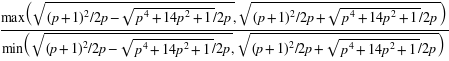

In [9]:
Acond = A.condition_number()
Acond

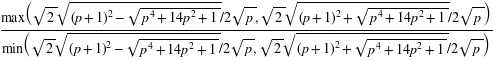

In [10]:
Acond = Acond.simplify()
Acond 

In [11]:
# Function for solving numerically
# What is the type of matrix constructed here?
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
AA(4)

array([[1. , 2. ],
       [1. , 0.5]])

In [12]:
AA(6)

array([[1.        , 2.44948974],
       [1.        , 0.40824829]])

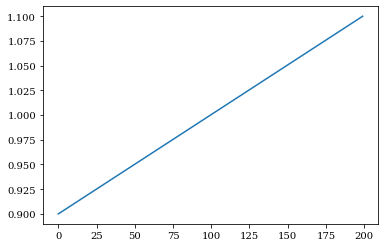

In [13]:
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)
plt.plot(p_vec)

stopped here

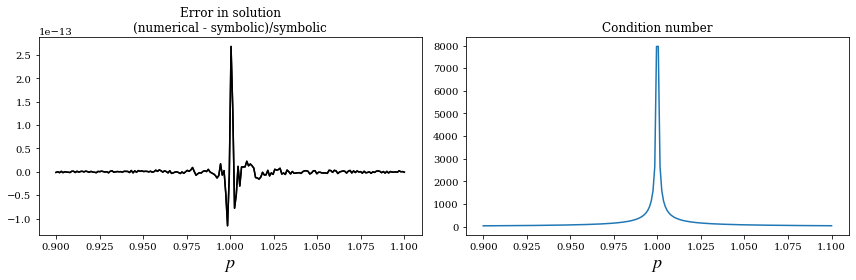

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('ch5-linear-systems-condition-number.pdf')

In [15]:
a11 = sympy.symbols("a11")
a12 = sympy.symbols("a12")
a21 = sympy.symbols("a21")
a22 = sympy.symbols("a22")

M = sympy.Matrix([[a11, a12], [a21, a22]])
M

⎡a₁₁  a₁₂⎤
⎢        ⎥
⎣a₂₁  a₂₂⎦

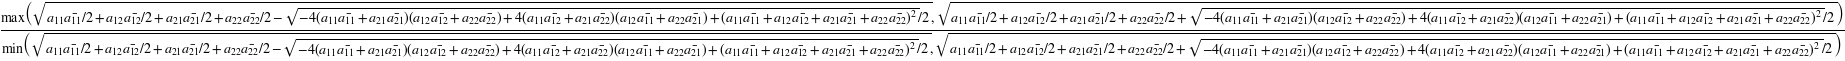

In [16]:
M.condition_number()

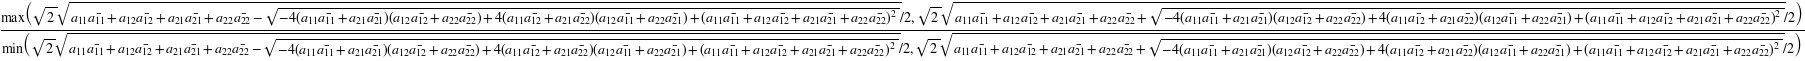

In [17]:
M.condition_number().simplify()